In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.applications.vgg16 import VGG16
from glob import glob

In [2]:
img_size = [224,224]

train_dataset = 'chest_xray/train'
test_dataset = 'chest_xray/test'

In [3]:
vgg = VGG16(input_shape=img_size+[3], weights='imagenet', include_top=False)

In [4]:
for x in vgg.layers:
    x.trainable =False

In [6]:
classes = glob('chest_xray/train/*')
classes

['chest_xray/train/NORMAL', 'chest_xray/train/PNEUMONIA']

In [7]:
x = tf.keras.layers.Flatten()(vgg.output)

In [8]:
cl = tf.keras.layers.Dense(len(classes), activation = 'softmax')(x)

In [9]:
model = Model(inputs = vgg.input, outputs = cl)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
train_data = train_datagen.flow_from_directory('chest_xray/train',
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')
test_data = test_datagen.flow_from_directory('chest_xray/test',
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [14]:
J = model.fit_generator(train_data,
                        validation_data=test_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_steps= len(test_data))

/home/cyber-mysterio/anaconda3/envs/ultron/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 457s 3s/step - loss: 0.2978 - accuracy: 0.8799 - val_loss: 0.3519 - val_accuracy: 0.8942
Epoch 2/5
163/163 [==============================] - 498s 3s/step - loss: 0.1117 - accuracy: 0.9520 - val_loss: 0.2643 - val_accuracy: 0.9167
Epoch 3/5
163/163 [==============================] - 516s 3s/step - loss: 0.0902 - accuracy: 0.9644 - val_loss: 0.2895 - val_accuracy: 0.9038
Epoch 4/5
163/163 [==============================] - 493s 3s/step - loss: 0.0947 - accuracy: 0.9683 - val_loss: 0.2516 - val_accuracy: 0.9151
Epoch 5/5
163/163 [==============================] - 467s 3s/step - loss: 0.0783 - accuracy: 0.9688 - val_loss: 0.2620 - val_accuracy: 0.9167


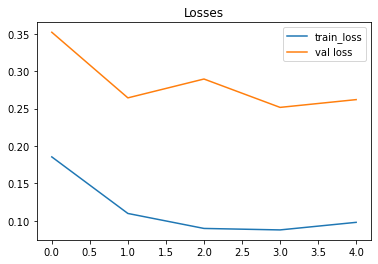

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(J.history['loss'], label = 'train_loss')
plt.plot(J.history['val_loss'], label = 'val loss')
plt.legend()
plt.title('Losses')
plt.show()
plt.savefig('Lossess VGG16 LungDisease')

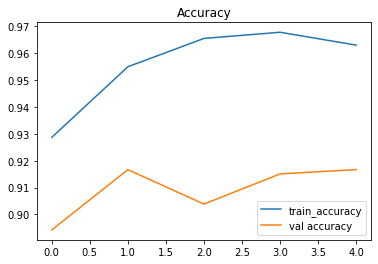

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(J.history['accuracy'], label = 'train_accuracy')
plt.plot(J.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()
plt.savefig('Accuracy VGG16 LungDisease')

In [17]:
model.save('model_vgg16_LD.h5')